<a href="https://colab.research.google.com/github/sahirsharma/CS7IS2_Assignment2_Repo/blob/master/classify_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources:

1. [Simple Image Classification using Convolutional Neural Network](https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8)
2. [Keras Models](https://keras.io/applications/)
3. [Keras Tutorial : Using pre-trained Imagenet models](http://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/)
4. [Deep Learning Model as REST API](https://shuaiw.github.io/2017/02/01/deep-learning-model-as-rest-api.html)
5. [Colaboratory Tips & Tricks](https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html?utm_content=buffer68ca7&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer)
6. [Image Analogys (style transfer)](https://github.com/awentzonline/image-analogies)

# Setup

In [0]:
!pip install -q keras
import keras

In [0]:
crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'
plane = "https://unsplash.com/photos/7ESmHghU_KY/download?force=true"

url = ["" for x in range(5)]
url[0] = crow
url[1] = wolf
url[2] = tiger
url[3] = plane
url[4] = sailboat

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import urllib.request
import cv2
import numpy as np

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

# VGG 16 App

In [29]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet, densenet
import numpy as np

#Need 224x224
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
  
#Need 299x299
#Load the Inception_V3 model 
inception_model = inception_v3.InceptionV3(weights='imagenet') 
 

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

#Need 224x224
#Load the densenet model
densenet3 = densenet.DenseNet121(weights='imagenet')

#Need 224x224
#Load the densenet model
densenet1 = densenet.DenseNet169(weights='imagenet')

#Need 224x224
#Load the densenet model
densenet2 = densenet.DenseNet201(weights='imagenet')



82526208/82524592 [==============================] - 1s 0us/step


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
original = url_to_image(url, 224)
print('PIL original image size',original.size)
plt.imshow(original)
# plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
# plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# plt.imshow(np.uint8(image_batch[0]))


In [91]:
array = np.zeros((4,224,224,3))

array[0] = image_batch[0]
array[1] = image_batch[0]
array[2] = image_batch[0]
array[3] = image_batch[0]
image_batch = array
image_batch.shape

(4, 224, 224, 3)

warplane 0.6995942
space_shuttle 0.17780857
airliner 0.08083399
wing 0.031761665
American_alligator 0.0012549589
__________________________
warplane 0.6995942
space_shuttle 0.17780857
airliner 0.08083399
wing 0.031761665
American_alligator 0.0012549589
__________________________
warplane 0.6995942
space_shuttle 0.17780857
airliner 0.08083399
wing 0.031761665
American_alligator 0.0012549589
__________________________


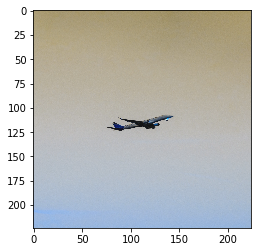

In [103]:
# prepare the image for the VGG model
processed_image = densenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = densenet1.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)

for i in range(0,4):
  for prediction in decode_predictions(predictions)[i]:
    print(prediction[1], prediction[2])
  print("__________________________")

wing 0.5013805
warplane 0.23773035
airliner 0.21418506
space_shuttle 0.012688187
dragonfly 0.01010606


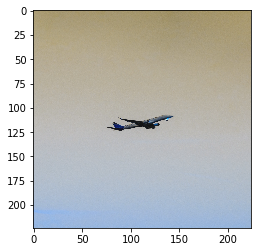

In [58]:
# prepare the image for the VGG model
processed_image = densenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = densenet2.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

wing 0.39725965
warplane 0.3322554
airliner 0.2266911
airship 0.023404313
space_shuttle 0.013570343


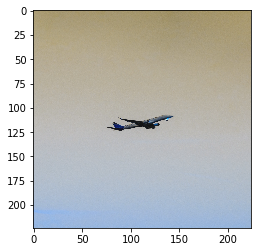

In [59]:
# prepare the image for the VGG model
processed_image = densenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = densenet3.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

yawl 0.7427812
catamaran 0.067620486
trimaran 0.051548567
schooner 0.024784425
pirate 0.0009668583


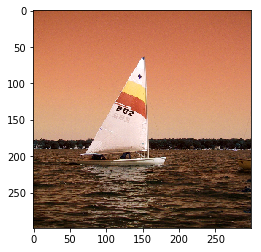

In [25]:
# prepare the image for the VGG model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])


yawl 0.43911487
catamaran 0.30459502
trimaran 0.15244274
schooner 0.08784651
beacon 0.0095507875


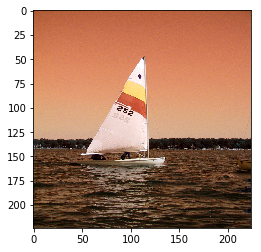

In [16]:
# prepare the image for the VGG model
processed_image = resnet50.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])

catamaran 0.4891991
trimaran 0.29943752
yawl 0.20314239
schooner 0.0073370347
space_shuttle 0.00024042277


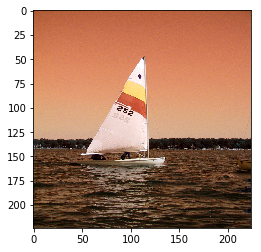

In [17]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])